In [1]:
import numpy as np
import matplotlib.pyplot as plt
import validator as val

from data_handler import DataHandler
from log_regression import LogisticalRegression
from calculations import Calculations

dh = DataHandler("spambase.data")
lr = LogisticalRegression()

In [2]:
# Pull, Split, Score, and SplitXY Data
# X is an N row by D column matrix, where N is hte number of observations and D is the number of features.  
# Y is an N by 1 column vector.  
# W is a D by 1 column vector.
data = dh.parse_data_no_header()
data = dh.shuffle_data(data)
data_train, data_test = dh.split_data(data)
tX, tY = dh.getXY(data_train, -1, -1)
vX, vY = dh.getXY(data_test, -1, -1)
# mean, std = dh.zscores(tX)
# accuracy = (true_values == predictions).sum() / N

mean, std = dh.zscore_data(tX, tX)
test = val.validate_zscore(tX)
tX = dh.apply_zscore(mean, std, tX)
vX = dh.apply_zscore(mean, std, vX)
b = 0
m, n = tX.shape
w = np.zeros((n,1))


TMean Cost after iteration 0: 0.693147
VMean Cost after iteration 0: 0.693147
TMean Cost after iteration 100: 0.670301
VMean Cost after iteration 100: 0.651937
TMean Cost after iteration 200: 0.650288
VMean Cost after iteration 200: 0.617840
TMean Cost after iteration 300: 0.632588
VMean Cost after iteration 300: 0.589244
TMean Cost after iteration 400: 0.616795
VMean Cost after iteration 400: 0.564948
TMean Cost after iteration 500: 0.602592
VMean Cost after iteration 500: 0.544064
TMean Cost after iteration 600: 0.589732
VMean Cost after iteration 600: 0.525926
TMean Cost after iteration 700: 0.578016
VMean Cost after iteration 700: 0.510029
TMean Cost after iteration 800: 0.567285
VMean Cost after iteration 800: 0.495982
TMean Cost after iteration 900: 0.557408
VMean Cost after iteration 900: 0.483479
TMean Cost after iteration 1000: 0.548279
VMean Cost after iteration 1000: 0.472278
TMean Cost after iteration 1100: 0.539807
VMean Cost after iteration 1100: 0.462184
TMean Cost after

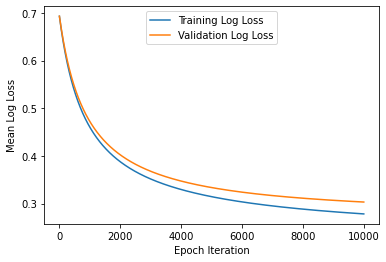

In [3]:
# calculate(self, w, b, tX, tY, vX, vY):
weights, bias, losses = lr.calculate(w, b, tX, tY, vX, vY)
plt.plot(losses["TR"], label="Training Log Loss")
plt.plot(losses["VAL"], label="Validation Log Loss")
plt.xlabel("Epoch Iteration")
plt.ylabel("Mean Log Loss")
plt.legend(loc='upper center')
plt.show()

In [4]:
tPreds = lr.prediction(weights, bias, tX)
vPreds = lr.prediction(weights, bias, vX)

t_calc = Calculations(tY, tPreds)
v_calc = Calculations(vY, vPreds)

t_acc, t_prec, t_recall, t_fmeasure = t_calc.evaluate()
v_acc, v_prec, v_recall, v_fmeasure = v_calc.evaluate()

print("Training Accuracy: {} %".format(100*t_acc))
print("Training Precision: {} %".format(100*t_prec))
print("Training Recall: {} %".format(100*t_recall))
print("Training F-Measure: {} %".format(100*t_fmeasure))

print("Validation Accuracy: {} %".format(100*v_acc))
print("Validation Precision: {} %".format(100*v_prec))
print("Validation Recall: {} %".format(100*v_recall))
print("Validation F-Measure: {} %".format(100*v_fmeasure))

Training Accuracy: 91.2292142158461 %
Training Precision: 85.6911883589329 %
Training Recall: 92.01388888888889 %
Training F-Measure: 88.74005860192548 %
Validation Accuracy: 90.93281148075668 %
Validation Precision: 85.59027777777779 %
Validation Recall: 89.79963570127505 %
Validation F-Measure: 87.64444444444445 %


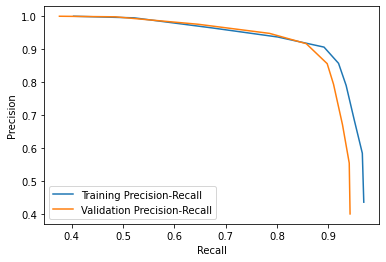

In [65]:
precisions = list()
recalls = list()
v_precision = list()
v_recall = list()
for i in range(10):
    threshold = i/10

    tPreds = lr.prediction(weights, bias, tX, threshold)
    vPreds = lr.prediction(weights, bias, vX, threshold)
    
    t_calc = Calculations(tY, tPreds)
    v_calc = Calculations(vY, vPreds)
    
    P, TP, TN, FP, FN = t_calc.setup()
    vP, vTP, vTN, vFP, vFN = v_calc.setup()

    precision = t_calc.precision(TP, FP)
    precisions.append(precision)
    
    recall = t_calc.recall(TP, FN)
    recalls.append(recall)
    
    vPrecision = v_calc.precision(vTP, vFP)
    v_precision.append(vPrecision)
    vRecall = t_calc.recall(vTP, vFN)
    v_recall.append(vRecall)

# plt.xlim([0.0,0.9])
# # # plt.xticks(recalls)
# plt.ylim([0.0,1.0])
plt.title("Precision-Recall Graph")
plt.plot(precisions, recalls, label="Training Precision-Recall")
plt.plot(v_precision, v_recall, label="Validation Precision-Recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc='lower left')
plt.show()